# Distribution of DMGs across the genome
Focusing specifically on how many DMGs are in each chromosome and where? Are there any chromosomes that are more affected than others? 

#### 0. load libraries

In [10]:
library(rtracklayer)
library(tidyverse)
library(RColorBrewer) 

#### 1. read in dfs, clean up

In [3]:
dmg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/all_sigDMGs.csv')
head(dmg)

,symbol,name,pair
,<chr>,<chr>,<chr>
1,LOC111117760,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC"
2,LOC111119327,"calcyphosin-like protein, transcript variant X3","CH, HH, CC"
3,LOC111123492,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC"
4,LOC111124674,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC"
5,LOC111129146,FERM domain-containing protein 8-like,"CH, HH, CC"
6,LOC111133438,uncharacterized LOC111133438,"CH, HH, CC"


In [5]:
# read in gff file
gff <- as.data.frame(import.gff('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/CV_working_genomic.gff'))

# only grab gene features
gff_genes <- gff[grep("LOC", gff$Name),1:12]

# filter to only include genes that are DMG
dmg_gff <- gff_genes[gff_genes$Name %in% dmg$symbol,]

# double check everything looks good
head(dmg_gff)

# are the dimensions the same? 
dim(dmg_gff)
dim(dmg)


,seqnames,start,end,width,strand,source,type,score,phase,ID,Dbxref,Name
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<list>,<chr>
303,NC_035780.1,315522,340261,24740,+,Gnomon,gene,NA,NA,gene-LOC111133260,GeneID:1....,LOC111133260
543,NC_035780.1,444907,453310,8404,-,Gnomon,gene,NA,NA,gene-LOC111109809,GeneID:1....,LOC111109809
16195,NC_035780.1,9011563,9043404,31842,-,Gnomon,gene,NA,NA,gene-LOC111137635,GeneID:1....,LOC111137635
16555,NC_035780.1,9288063,9301976,13914,-,Gnomon,gene,NA,NA,gene-LOC111132155,GeneID:1....,LOC111132155
27864,NC_035780.1,13324137,13332152,8016,+,Gnomon,gene,NA,NA,gene-LOC111113022,GeneID:1....,LOC111113022
28276,NC_035780.1,13591534,13596982,5449,-,Gnomon,gene,NA,NA,gene-LOC111131329,GeneID:1....,LOC111131329


[1] 217  12

[1] 217   3

Warning message in geom_histogram(stat = "count", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


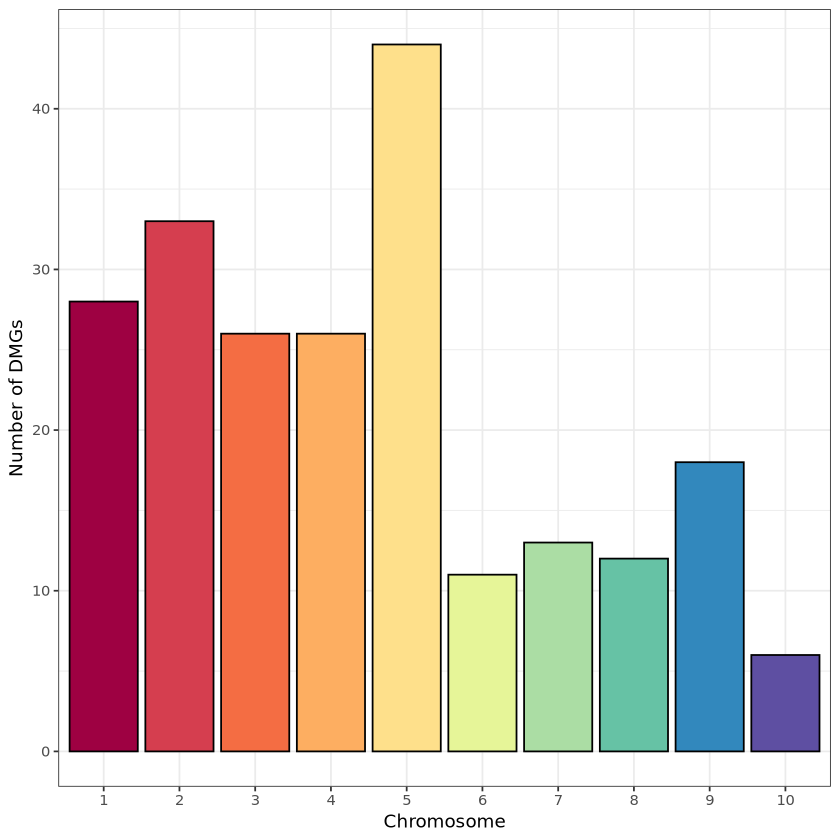

In [22]:
ggplot(dmg_gff, aes(x=seqnames, fill = seqnames)) + 
geom_histogram(stat="count",
              color = 'black') + 
scale_fill_brewer(palette = "Spectral") +
scale_x_discrete(labels = c("NC_035780.1" = "1",
                            "NC_035781.1" = "2", 
                            "NC_035782.1" = "3",
                           "NC_035783.1" = "4",
                            "NC_035784.1" = "5",
                            "NC_035785.1" = "6",
                            "NC_035786.1" = "7", 
                            "NC_035787.1" = "8",
                            "NC_035788.1" = "9",
                            "NC_035789.1" = "10"
                           )) +
labs(x = "Chromosome",
    y = "Number of DMGs") + 
guides(fill = FALSE) +
theme_bw()

could also do percent of the chromosome that is methylated? in case chr 5 just has more genes overall and chr 10 has less genes? 

In [38]:
gff_count <- gff %>%
filter(type == 'gene') %>% # only want genes
group_by(seqnames) %>% # group by chromosome
summarise(gene_count = n()) # count genes on each chromosome

# remove mitochondria
gff_count <- gff_count[-1,]

gff_count

seqnames,gene_count
<fct>,<int>
NC_035780.1,3862
NC_035781.1,4053
NC_035782.1,4612
NC_035783.1,3834
NC_035784.1,6154
NC_035785.1,2595
NC_035786.1,2978
NC_035787.1,4354
NC_035788.1,4875


In [37]:
dmg_count <- dmg_gff %>%
group_by(seqnames) %>% 
summarise(dmg_count = n()) 

dmg_count

seqnames,dmg_count
<fct>,<int>
NC_035780.1,28
NC_035781.1,33
NC_035782.1,26
NC_035783.1,26
NC_035784.1,44
NC_035785.1,11
NC_035786.1,13
NC_035787.1,12
NC_035788.1,18


In [42]:
perc_dmg <- merge(gff_count, dmg_count, by = "seqnames")

perc_dmg

seqnames,gene_count,dmg_count
<fct>,<int>,<int>
NC_035780.1,3862,28
NC_035781.1,4053,33
NC_035782.1,4612,26
NC_035783.1,3834,26
NC_035784.1,6154,44
NC_035785.1,2595,11
NC_035786.1,2978,13
NC_035787.1,4354,12
NC_035788.1,4875,18


In [44]:
perc_dmg$percent_dmg <- round(perc_dmg$dmg_count/perc_dmg$gene_count * 100, 2)

perc_dmg

seqnames,gene_count,dmg_count,percent_dmg
<fct>,<int>,<int>,<dbl>
NC_035780.1,3862,28,0.73
NC_035781.1,4053,33,0.81
NC_035782.1,4612,26,0.56
NC_035783.1,3834,26,0.68
NC_035784.1,6154,44,0.71
NC_035785.1,2595,11,0.42
NC_035786.1,2978,13,0.44
NC_035787.1,4354,12,0.28
NC_035788.1,4875,18,0.37


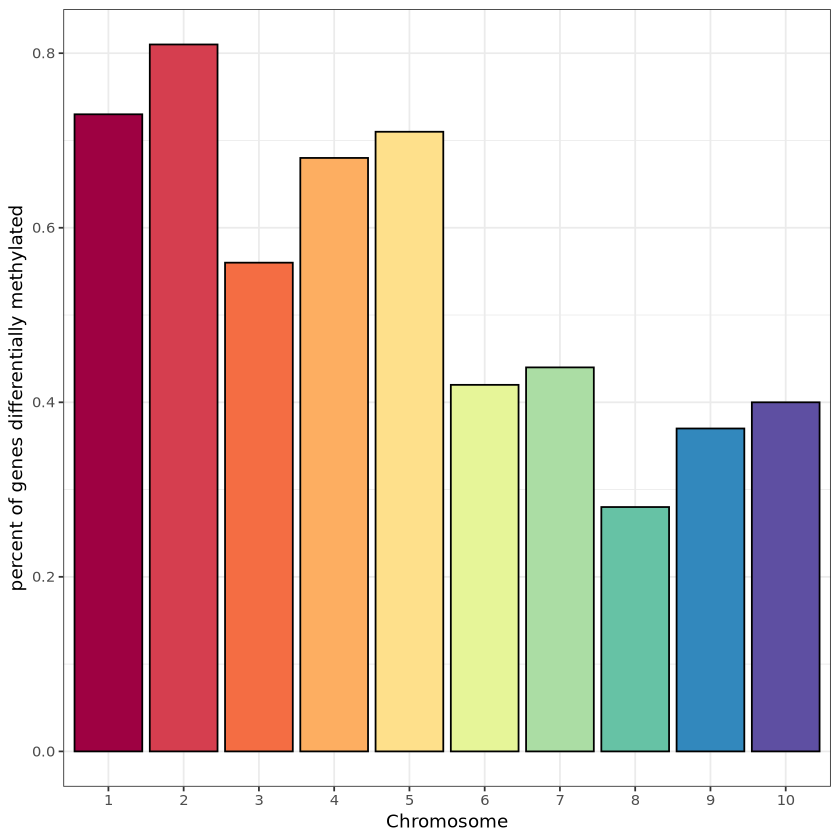

In [50]:
ggplot(perc_dmg, aes(x=seqnames, y = percent_dmg, fill = seqnames)) + 
geom_bar(stat="identity",
              color = 'black') + 
scale_fill_brewer(palette = "Spectral") +
scale_x_discrete(labels = c("NC_035780.1" = "1",
                            "NC_035781.1" = "2", 
                            "NC_035782.1" = "3",
                           "NC_035783.1" = "4",
                            "NC_035784.1" = "5",
                            "NC_035785.1" = "6",
                            "NC_035786.1" = "7", 
                            "NC_035787.1" = "8",
                            "NC_035788.1" = "9",
                            "NC_035789.1" = "10"
                           )) +
labs(x = "Chromosome",
    y = "percent of genes differentially methylated") + 
guides(fill = FALSE) +
theme_bw()